In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('train-u6lujuX-CVtuZ9i (1) (1).csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


h0 - Loan will be granted

h1 - Loan will not be granted

In [3]:
#Dropping teh loan ID column
data.drop('Loan_ID',axis = 1,inplace=True)
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


## Exploratory Data Analysis

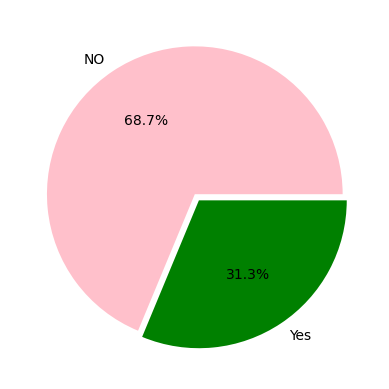

In [5]:
# Let's create a Pie-Chart to graphically represent the class distribution
import plotly.graph_objects as go
explode=[.0,.05]
labels = ["NO","Yes"]
mycolors = ["pink","Green"]
sizes=data["Loan_Status"].value_counts().values
plt.pie(sizes,explode=explode,labels= labels,colors=mycolors,autopct="%1.1f%%")
plt.show()

#### Analysing Numerical Data

In [6]:
b = data.select_dtypes(include=np.number)
b

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


In [7]:
b.drop(['Loan_Amount_Term','Credit_History'],inplace = True,axis=1)   #As these two are not continuous values

In [8]:
b

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,5849,0.0,NaN
1,4583,1508.0,128.0
2,3000,0.0,66.0
3,2583,2358.0,120.0
4,6000,0.0,141.0
...,...,...,...
609,2900,0.0,71.0
610,4106,0.0,40.0
611,8072,240.0,253.0
612,7583,0.0,187.0


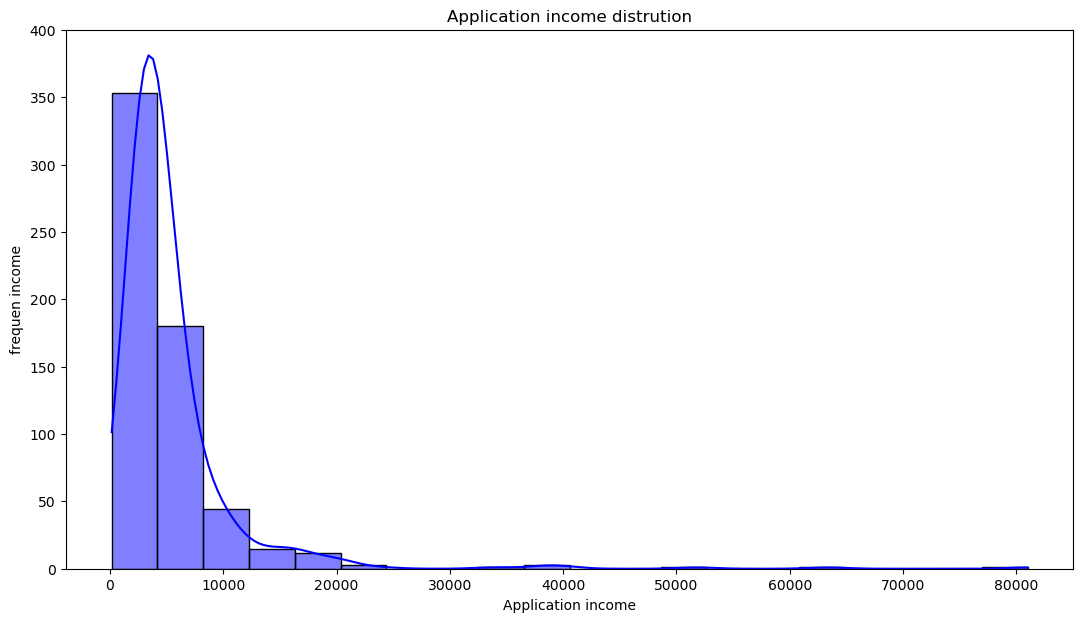

In [9]:
#Distribution for Applicant
plt.figure(figsize=(13,7))
sns.histplot(data.ApplicantIncome,bins=20,kde=True,color='blue')

plt.title('Application income distrution')
plt.xlabel('Application income')
plt.ylabel('frequen income')
plt.show()

All the three graphs have significant amount of outliers and are skwed.
Max number of applicant Income lies in the range of 150 and 10000.
Max number of LoanAmount lies in the range of 10 and 250.

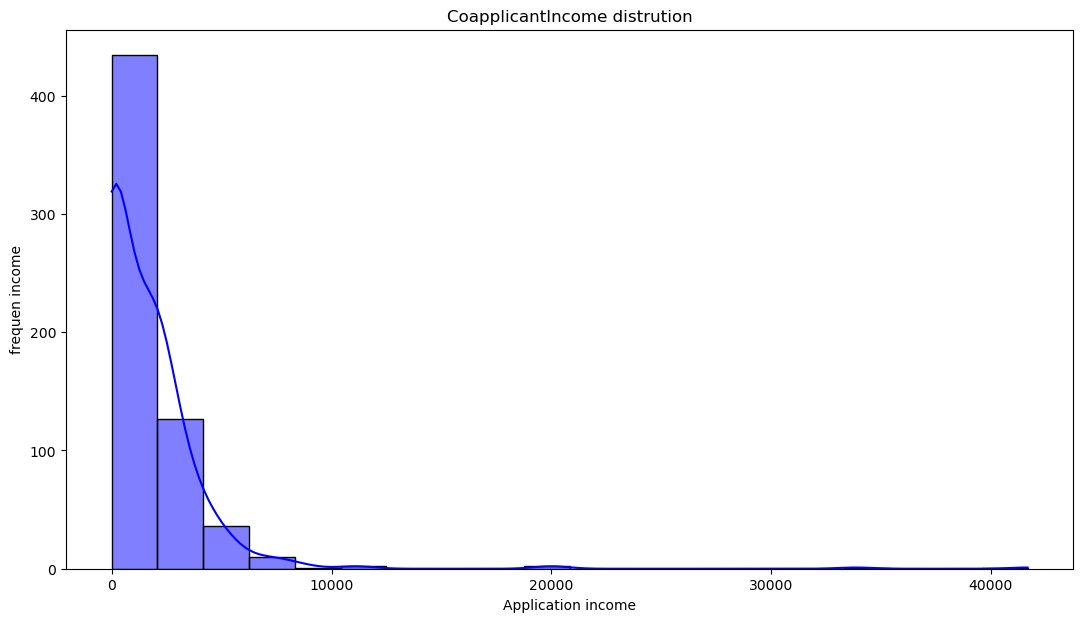

In [10]:
plt.figure(figsize=(13,7))
sns.histplot(data.CoapplicantIncome,bins=20,kde=True,color='blue')
plt.title('CoapplicantIncome distrution')
plt.xlabel('Application income')
plt.ylabel('frequen income')
plt.show()

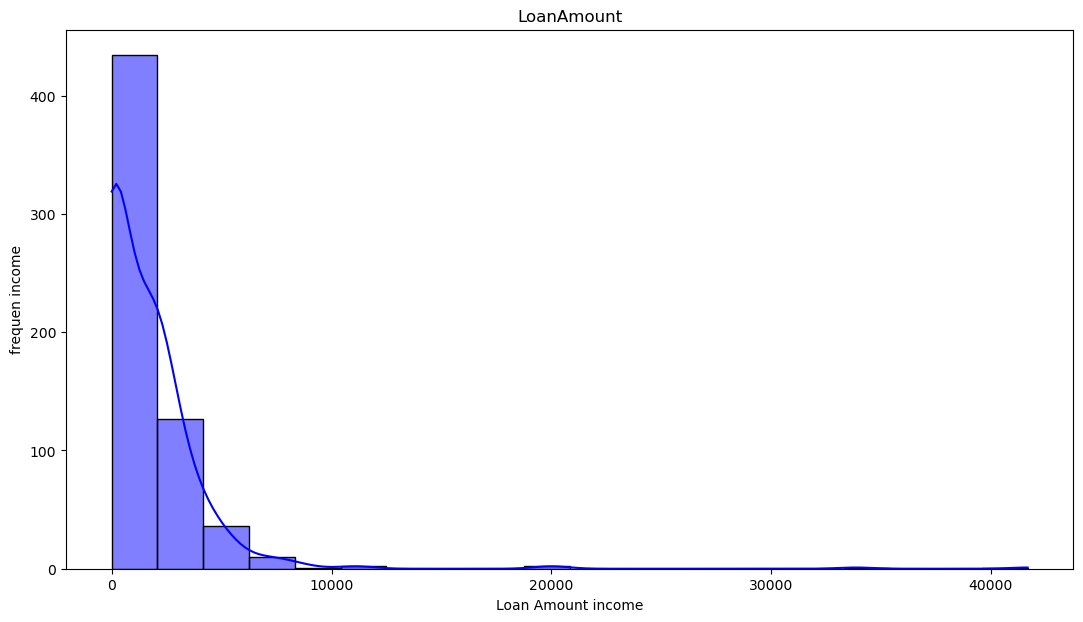

In [11]:
plt.figure(figsize=(13,7))
sns.histplot(data.CoapplicantIncome,bins=20,kde=True,color='blue')
plt.title('LoanAmount')
plt.xlabel('Loan Amount income')
plt.ylabel('frequen income')
plt.show()

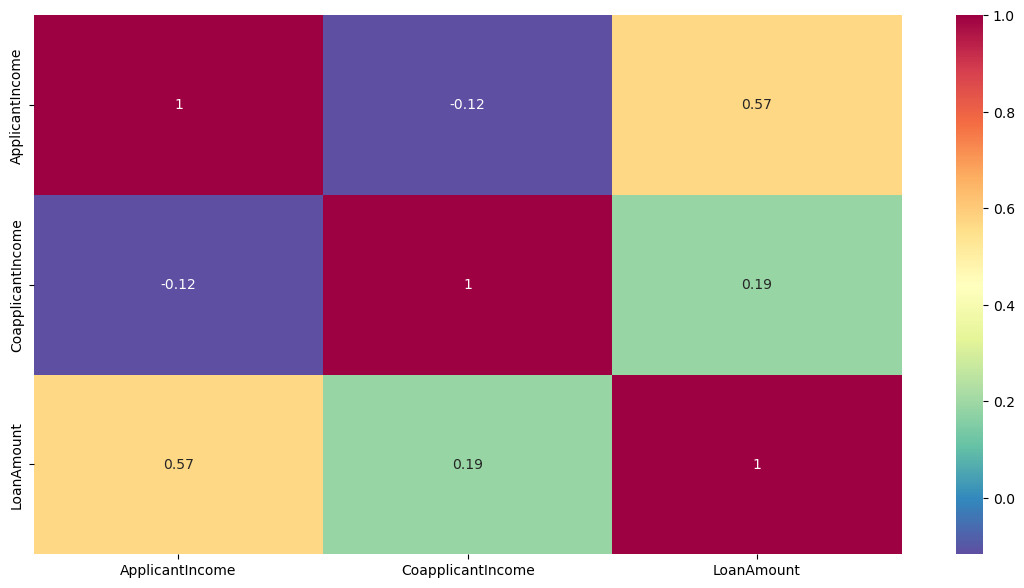

In [12]:
plt.figure(figsize=(14,7))
cor=b.corr()
sns.heatmap(cor,annot=True,cmap='Spectral_r')
plt.show()

There exists a strong relation between ApplicantIncome and LoanAmount. 
This means that higher the income higher the ask for loan

There is also a considerable amount of dependence between CoapplicantIncome and LoanAmount

### Analysing Catagorical Data

In [13]:
data_cat = data.select_dtypes(include=object)
data_cat.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

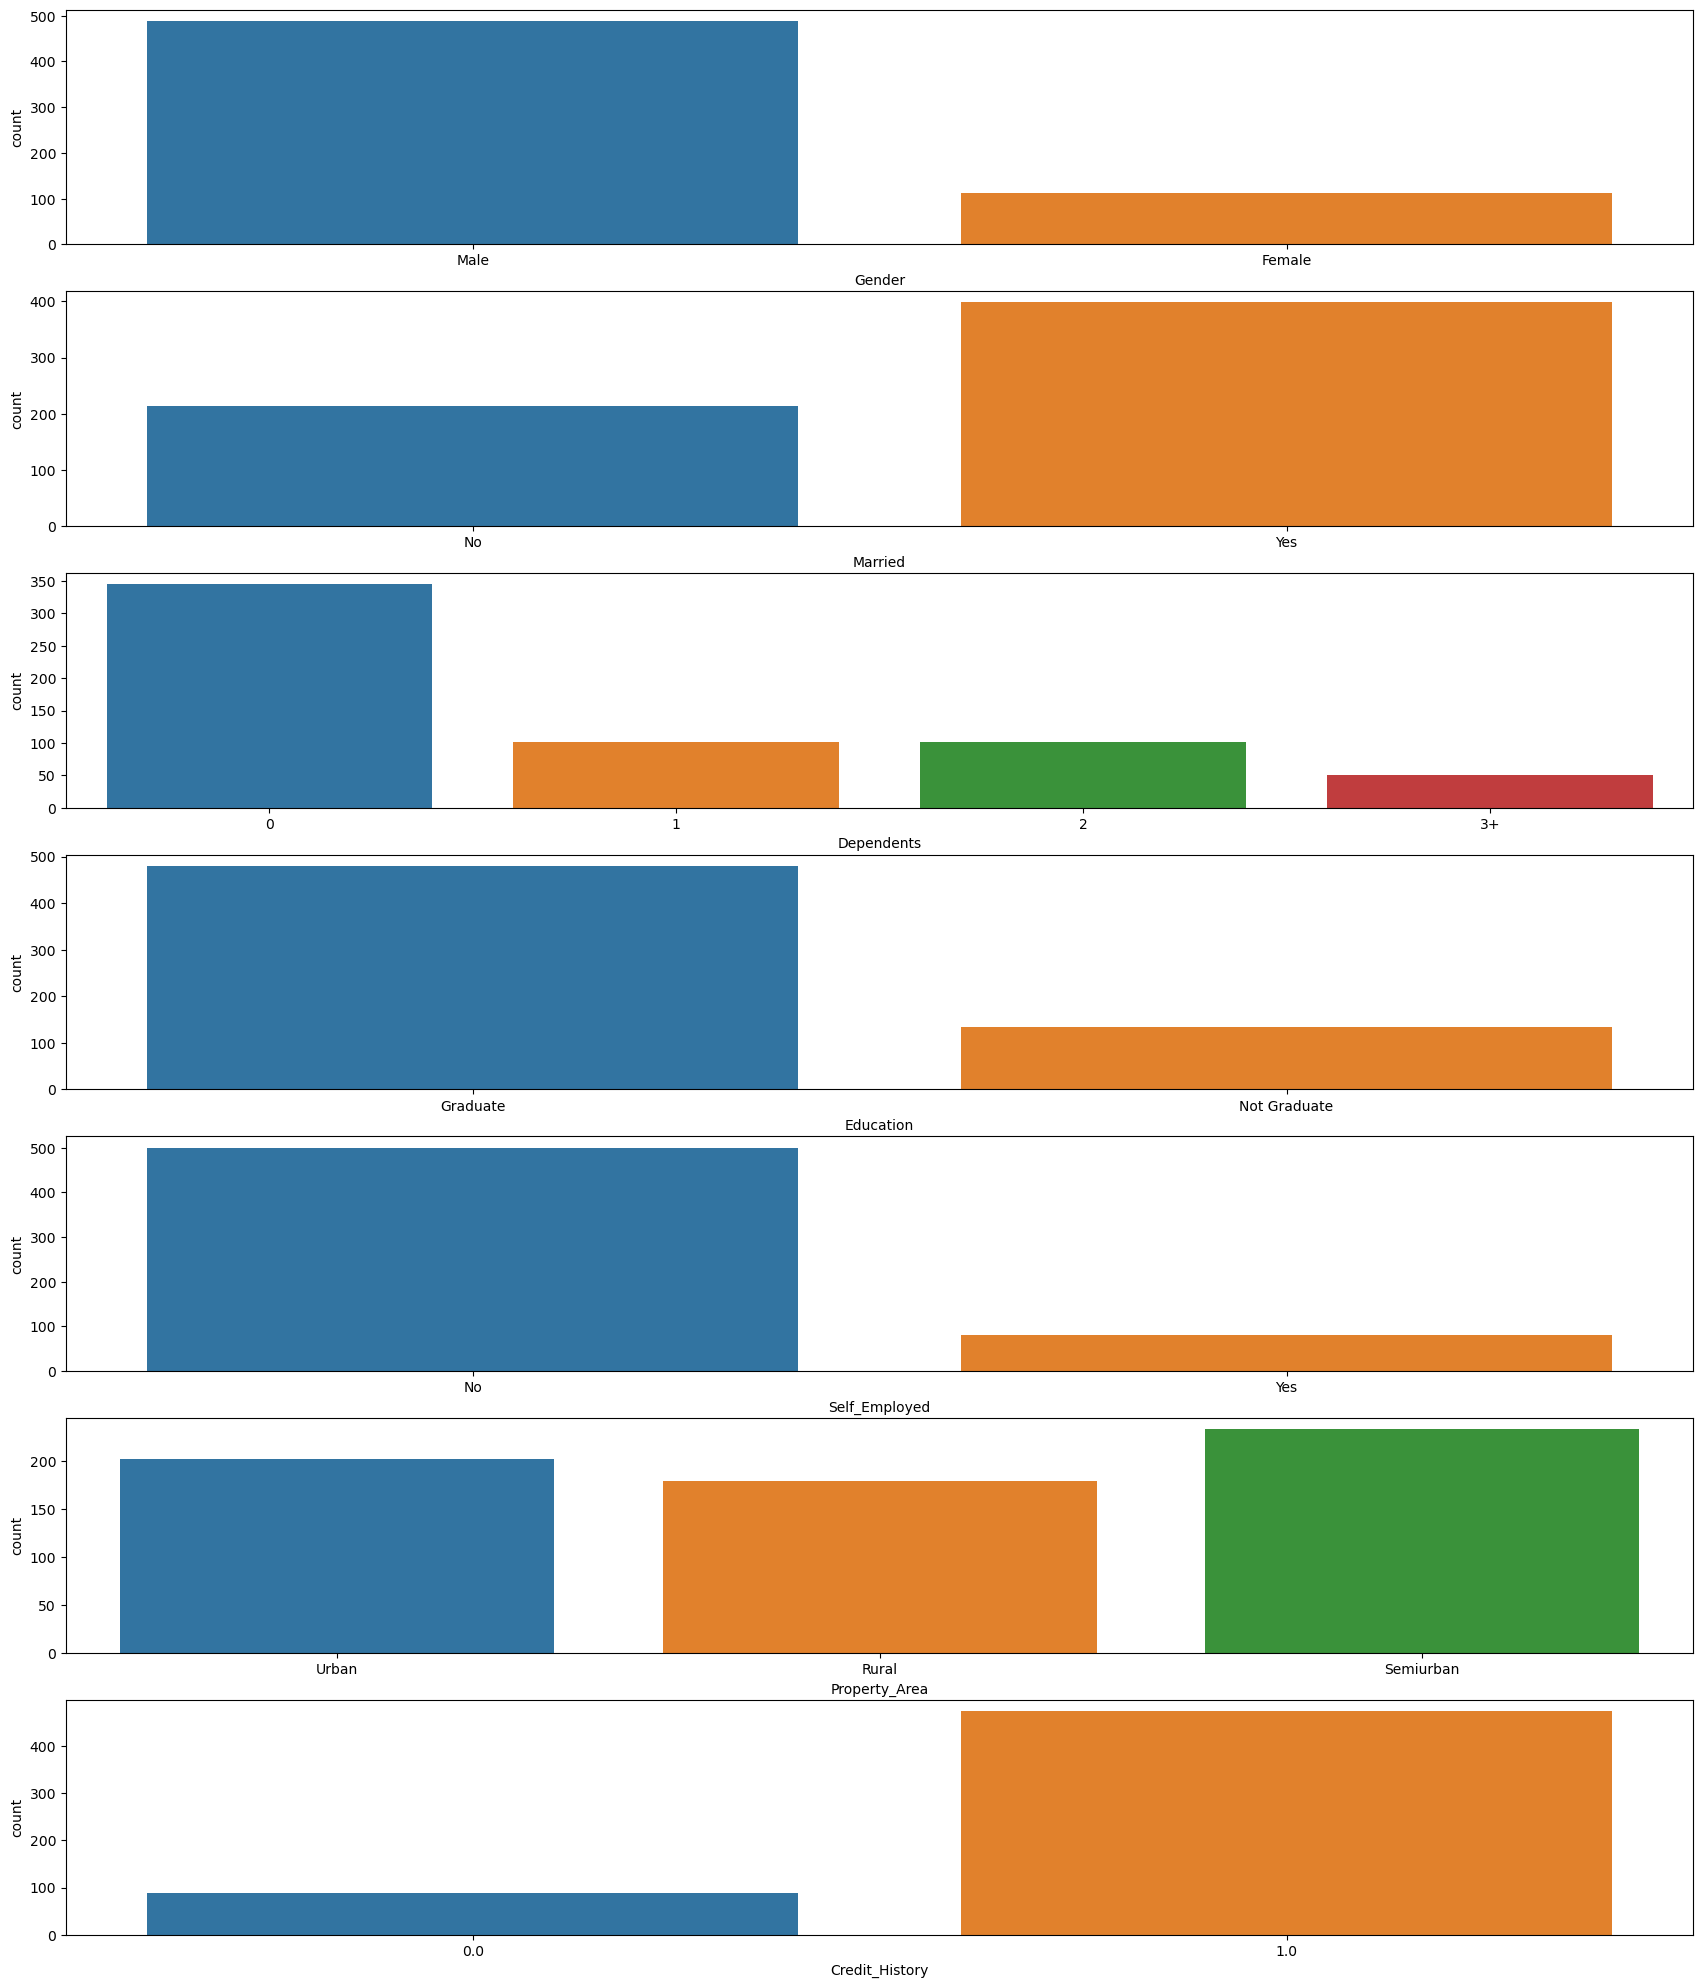

In [14]:
fig,ax = plt.subplots(7,1,figsize=(21,25))

cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area','Credit_History']

for i,val in enumerate(cols):
    sns.countplot(x=val,data=data,ax=ax[i])

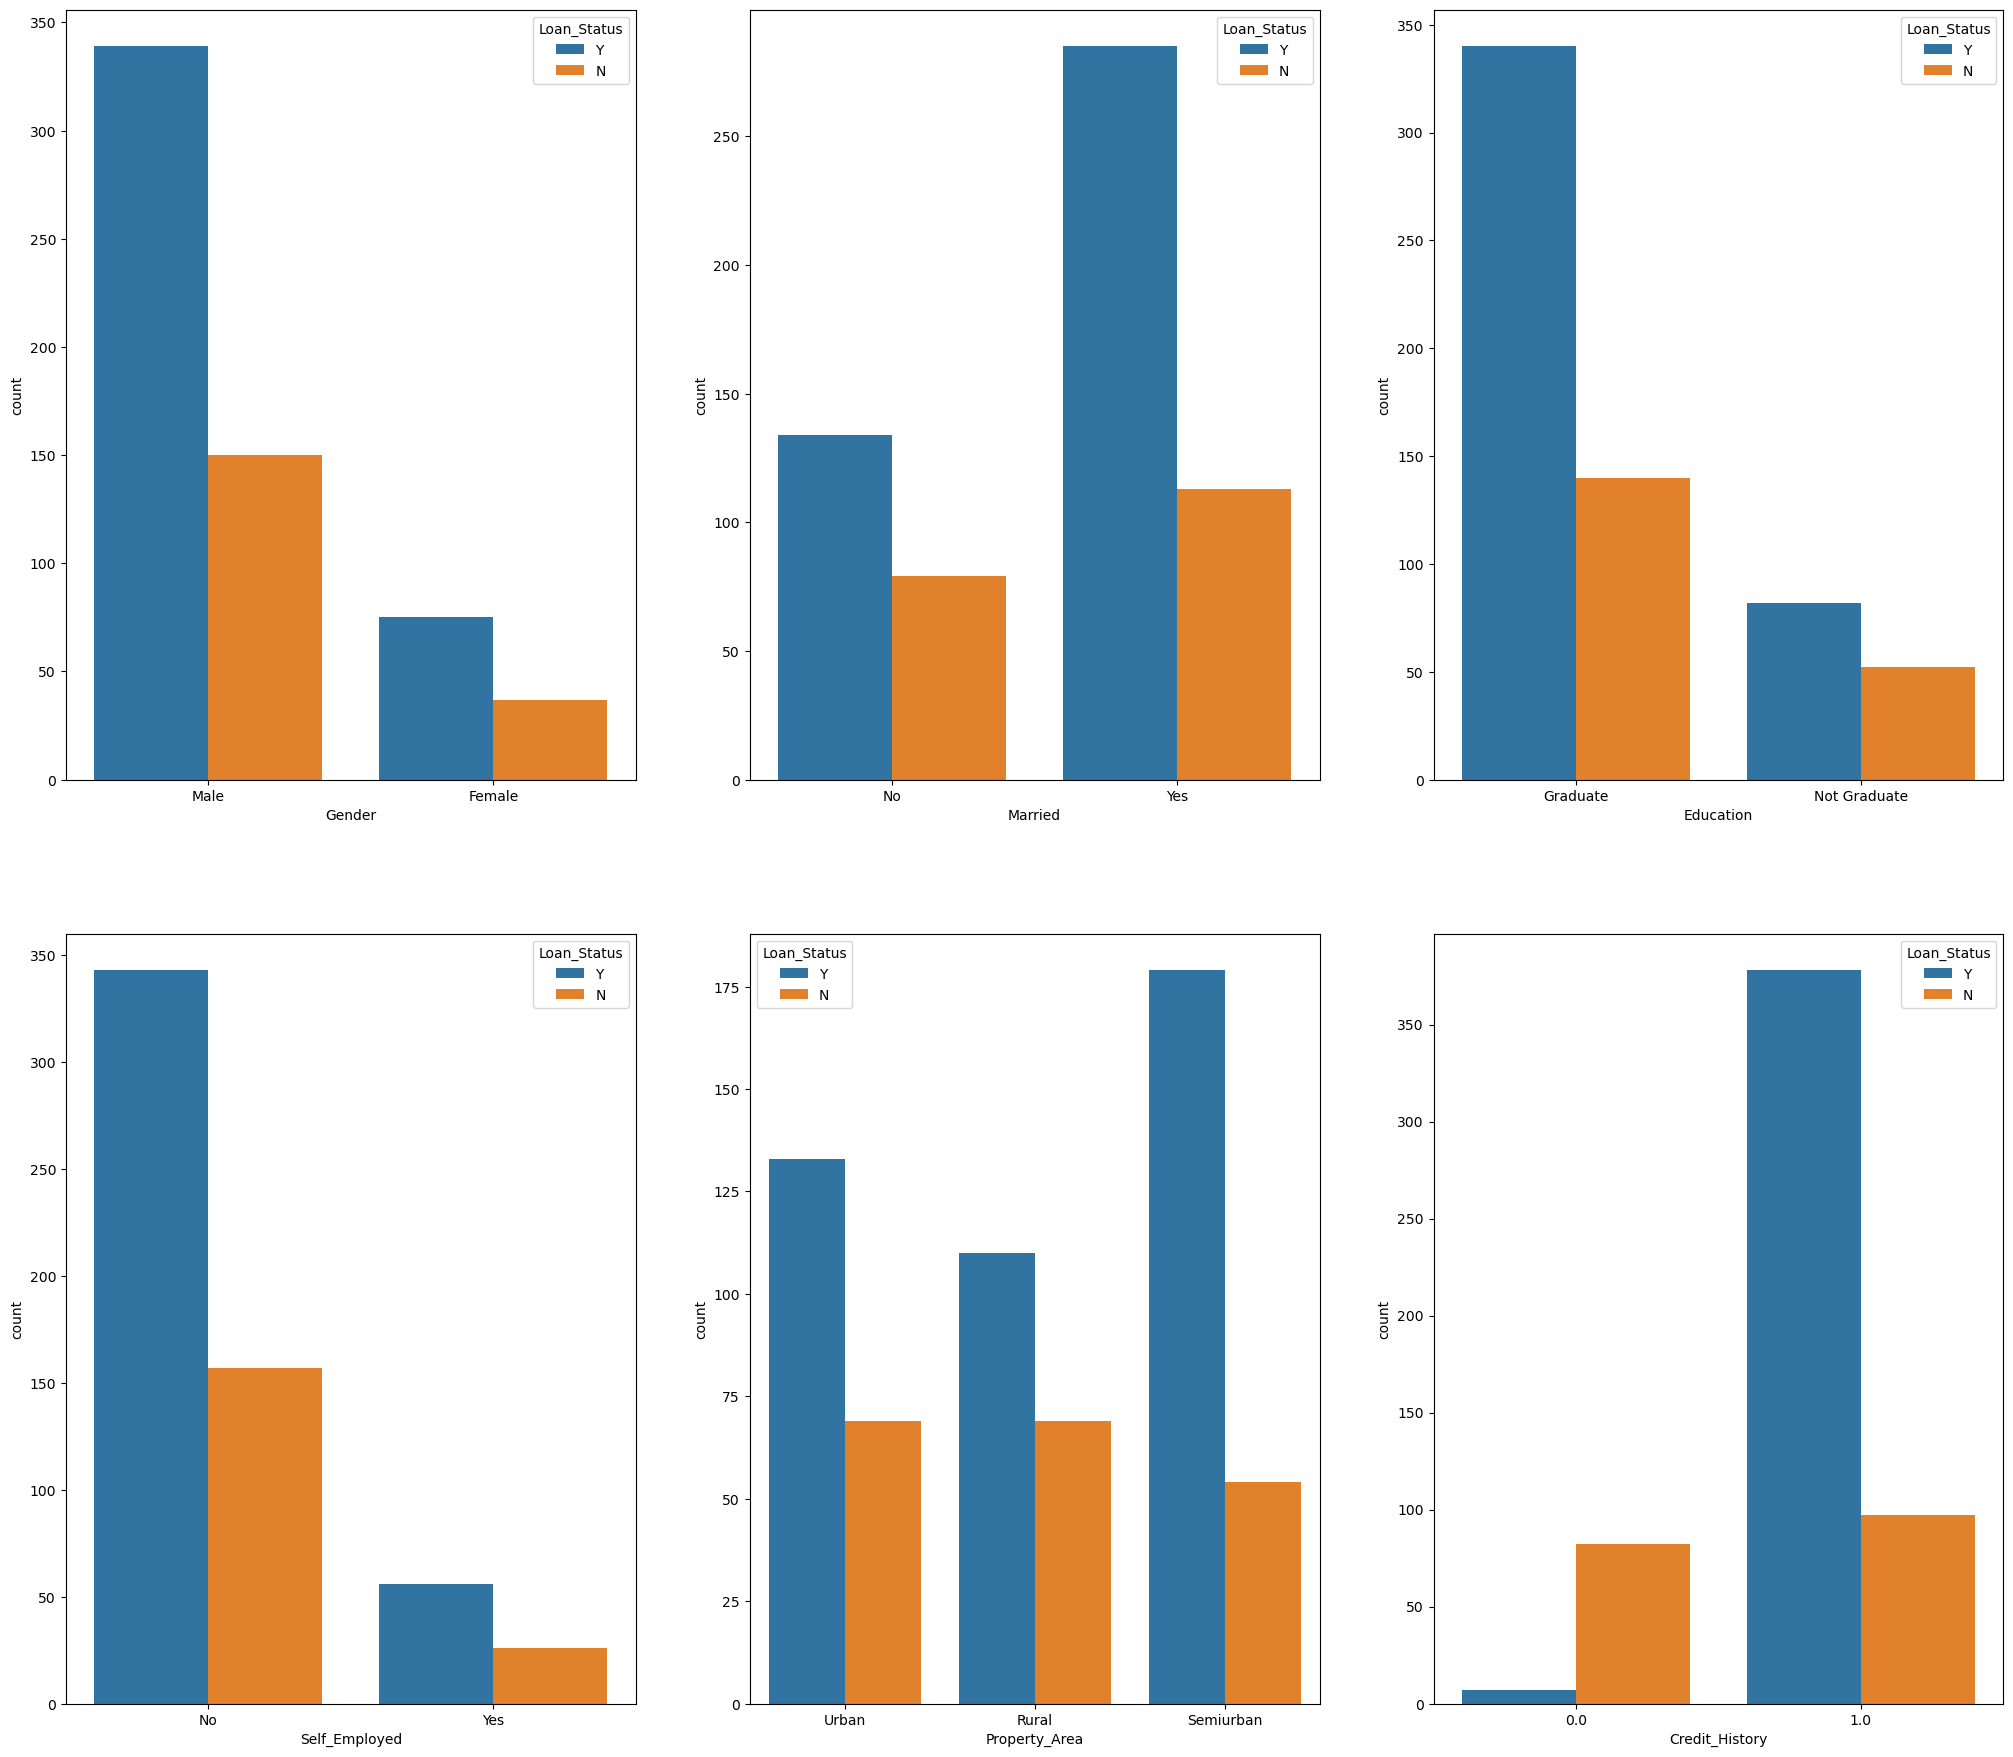

In [15]:
figsize,ax = plt.subplots(2,3,figsize=(25,22))
sns.countplot(x='Gender',hue='Loan_Status',data=data,ax=ax[0][0])
sns.countplot(x='Married',hue='Loan_Status',data=data,ax=ax[0][1])
sns.countplot(x='Education',hue='Loan_Status',data=data,ax=ax[0][2])
sns.countplot(x='Self_Employed',hue='Loan_Status',data=data,ax=ax[1][0])
sns.countplot(x='Property_Area',hue='Loan_Status',data=data,ax=ax[1][1])
sns.countplot(x='Credit_History',hue='Loan_Status',data=data,ax=ax[1][2])
plt.show()

In the Gender chart, it is observed that males have a higher likelihood of loan approval compared to females, but the ratio remains nearly the same.
In the Marital Status chart, couples tend to have a higher rate of loan approval compared to unmarried individuals.
In the Education chart, individuals who have completed their graduation have a higher chance of loan approval.
In the Self_Employed chart, the number of individuals with approved loans who are not self-employed is greater than those who are self-employed.
In the Property_Area chart, while all three categories have a substantial number of approved loans, individuals residing in semiurban areas have the highest number of approved loans.
In the Credit_History chart, it is evident that individuals with a good credit score consistently have their loans approved.

## Feature Engineering

In [16]:
##Checking Missing Values
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
#Imputing The missing vlaues with statistical data

data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)
data['Married'].fillna(data['Married'].mode()[0],inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0],inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].median(),inplace=True)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


### Changing catgorical Data

In [19]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status']
for i in cols:
    data[i]  = le.fit_transform(data[i])  
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


### Handling The Outliers

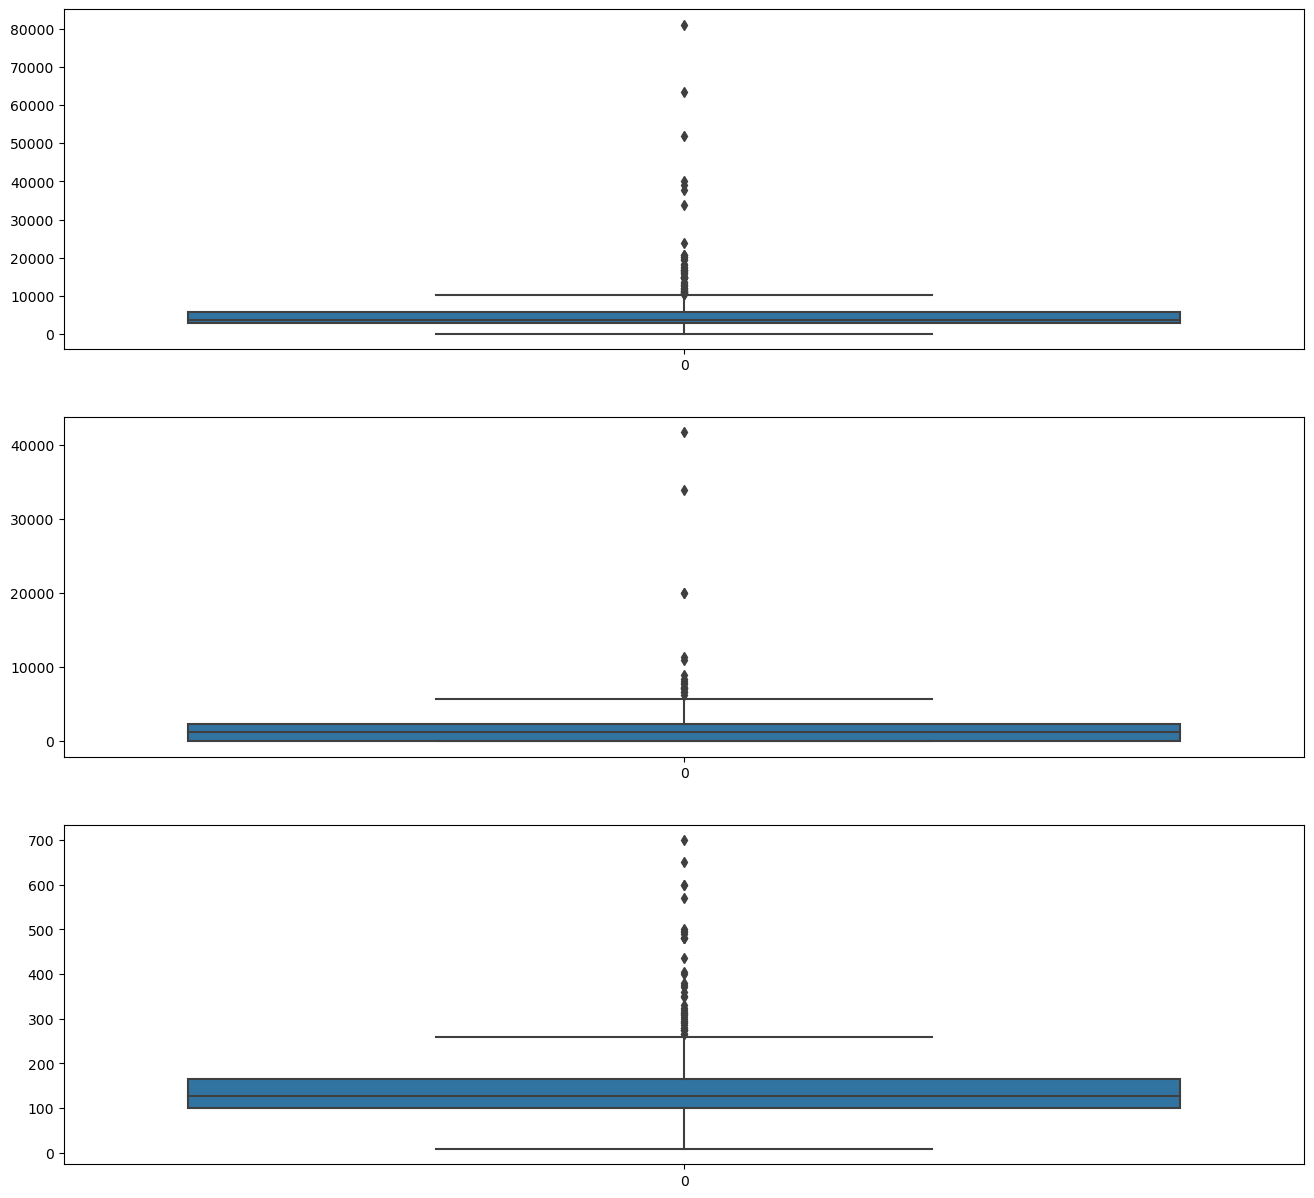

In [21]:
fig,ax = plt.subplots(3,1,figsize=(16,15))

sns.boxplot(data['ApplicantIncome'],ax=ax[0])
sns.boxplot(data['CoapplicantIncome'],ax=ax[1])
sns.boxplot(data['LoanAmount'],ax=ax[2])
plt.show()

In [22]:
q1 = data['ApplicantIncome'].quantile(0.25)
q3 = data['ApplicantIncome'].quantile(0.75)
q3,q1

(5795.0, 2877.5)

In [23]:
data['ApplicantIncome'].max()

81000

In [24]:
IQR = q3-q1
IQR

2917.5

In [25]:
up_bd = q3 + 3*IQR
lw_bd = q1 - 3*IQR
up_bd,lw_bd

(14547.5, -5875.0)

In [26]:
## Outlier for Application Income
data = data[(data['ApplicantIncome'] >= lw_bd) & (data['ApplicantIncome'] <= up_bd)]

In [27]:
#Outlier for Co-Applicant
q1=data['CoapplicantIncome'].quantile(0.25)
q3=data['CoapplicantIncome'].quantile(0.75)
data = data[(data['CoapplicantIncome'] >= q1-3*IQR) & (data['CoapplicantIncome'] <= q3+3*IQR)]

In [28]:
#Outlier for Loan Amount
q1=data['LoanAmount'].quantile(0.25)
q3=data['LoanAmount'].quantile(0.75)
data = data[(data['LoanAmount'] >= q1-3*IQR) & (data['LoanAmount'] <= q3+3*IQR)]

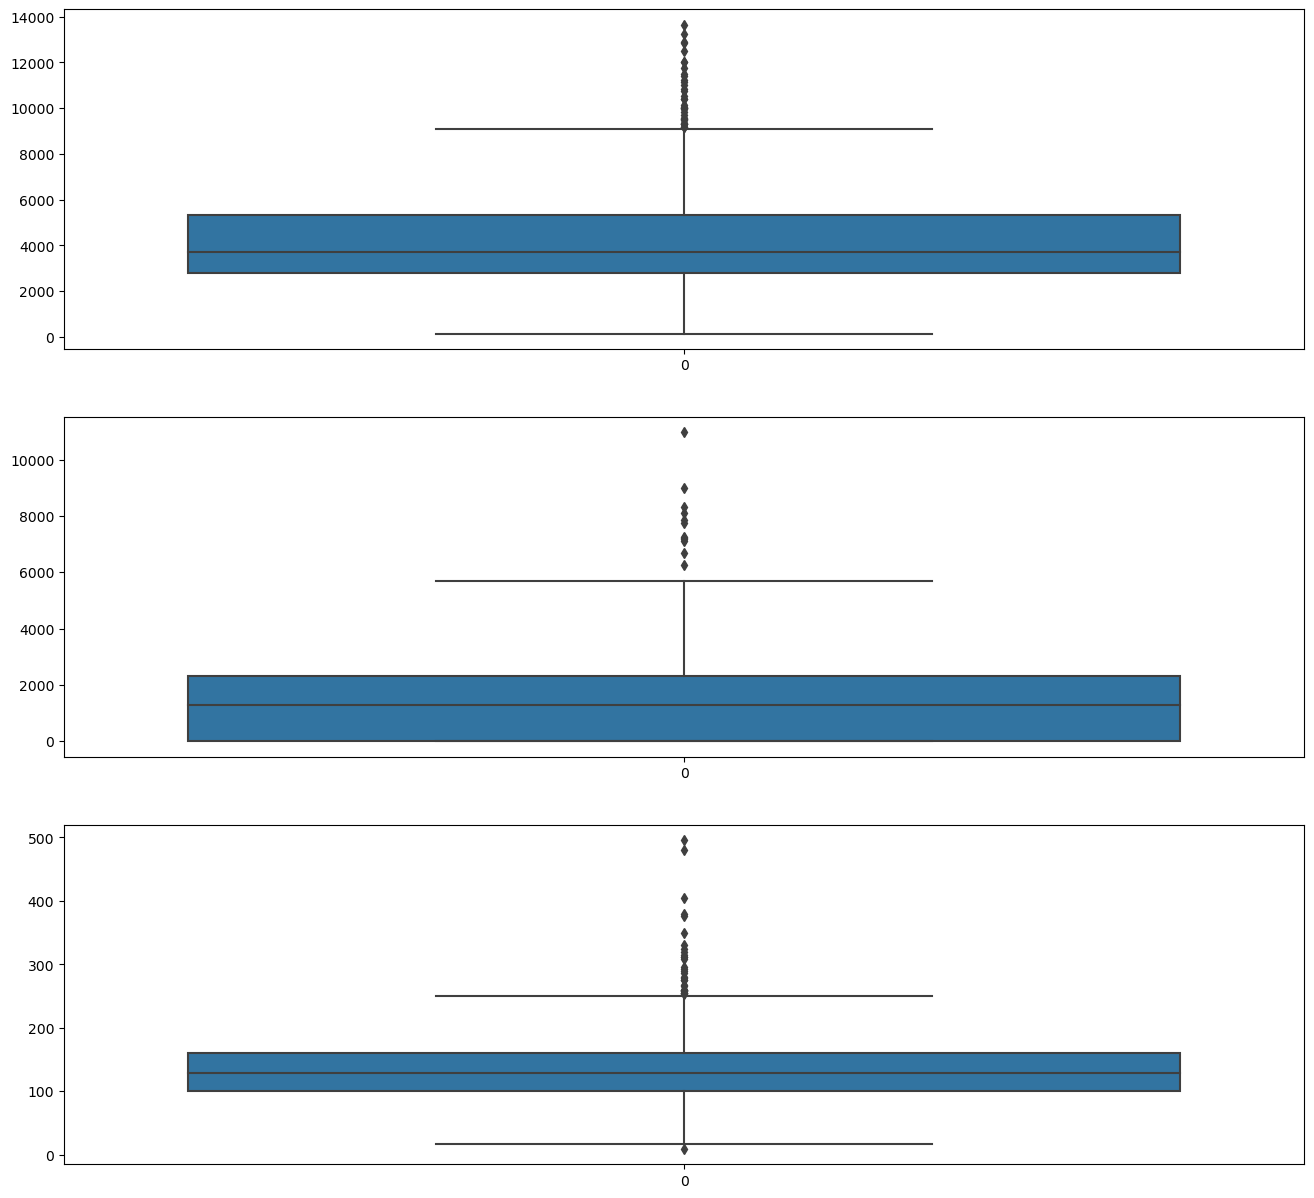

In [29]:
fig,ax = plt.subplots(3,1,figsize=(16,15))

sns.boxplot(data['ApplicantIncome'],ax=ax[0])
sns.boxplot(data['CoapplicantIncome'],ax=ax[1])
sns.boxplot(data['LoanAmount'],ax=ax[2])

plt.show()

### Feature Selection

In [30]:
from sklearn.feature_selection import chi2

In [31]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [32]:
x1 = data[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status']]
y1 = data['Loan_Status']

score = chi2(x1,y1)
score

(array([9.63434878e-02, 1.60098818e+00, 1.20775499e-01, 4.32301341e+00,
        3.48334650e-01, 3.01339192e-01, 1.79000000e+02]),
 array([7.56262517e-01, 2.05763227e-01, 7.28194916e-01, 3.76002804e-02,
        5.55057361e-01, 5.83044083e-01, 8.01242868e-41]))

In [33]:
p_values = pd.Series(score[1],index=x1.columns)
p_values

Gender           7.562625e-01
Married          2.057632e-01
Dependents       7.281949e-01
Education        3.760028e-02
Self_Employed    5.550574e-01
Property_Area    5.830441e-01
Loan_Status      8.012429e-41
dtype: float64

### *Test for independence (For catagorical data only)
Null Hypo - Variables are independent to each other

Alt Hypo - Variables are dependent to each other*

if pval<0.5 reject h0 else accept

In [34]:
irr_cols = []

for x in p_values.index:
    if p_values[x] <= 0.05:
        print(x,' :- Reject the Null Hypo')
    else:
        print(x,' :- Accept the Null Hypo')
        irr_cols.append(x)
        


Gender  :- Accept the Null Hypo
Married  :- Accept the Null Hypo
Dependents  :- Accept the Null Hypo
Education  :- Reject the Null Hypo
Self_Employed  :- Accept the Null Hypo
Property_Area  :- Accept the Null Hypo
Loan_Status  :- Reject the Null Hypo


In [35]:
irr_cols

['Gender', 'Married', 'Dependents', 'Self_Employed', 'Property_Area']

In [36]:
## Dropping irrelevant columns
data.drop(labels=irr_cols,axis=1,inplace=True)
data.drop('Loan_Amount_Term',axis=1,inplace=True)
data.head()

,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status
0,0,5849,0.0,128.0,1.0,1
1,0,4583,1508.0,128.0,1.0,0
2,0,3000,0.0,66.0,1.0,1
3,1,2583,2358.0,120.0,1.0,1
4,0,6000,0.0,141.0,1.0,1


## Making the Model

In [37]:
X = data.drop('Loan_Status',axis = 1)
y = data['Loan_Status']

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=32)

In [39]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((432, 5), (145, 5), (432,), (145,))

In [40]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [41]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [42]:
pred = dt.predict(X_test)
pred

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1])

## Evaluating The Model

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix,roc_auc_score, f1_score
print("Accuracy score:",accuracy_score(y_test,pred))
print("f1-score", f1_score(y_test,pred))
print("auc score: ", roc_auc_score(y_test,pred))

Accuracy score: 0.6758620689655173
f1-score 0.7638190954773869
auc score:  0.636904761904762


In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.43      0.55      0.48        40
           1       0.81      0.72      0.76       105

    accuracy                           0.68       145
   macro avg       0.62      0.64      0.62       145
weighted avg       0.70      0.68      0.69       145



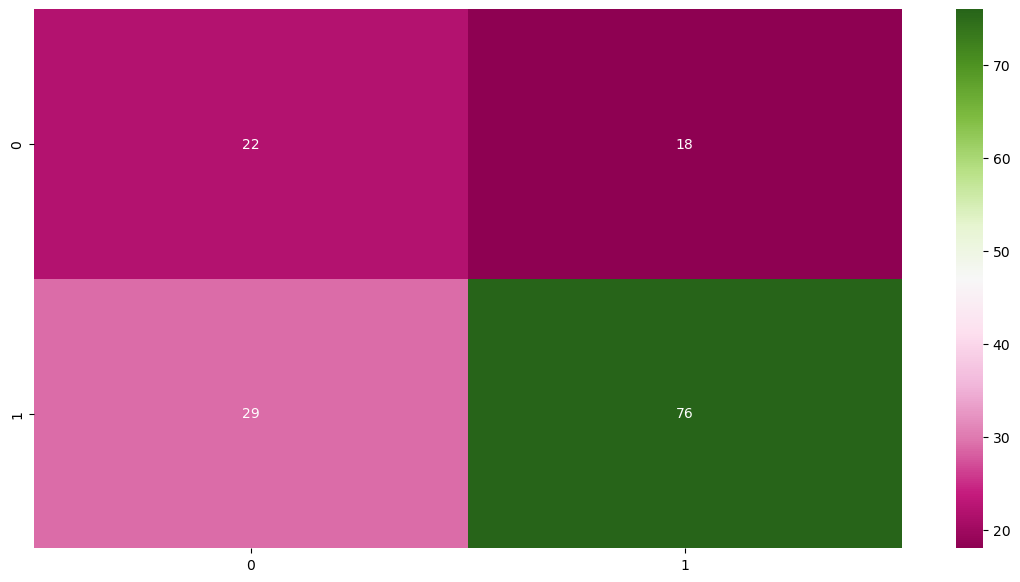

In [45]:
plt.figure(figsize=(14,7))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,cmap='PiYG')
plt.show()

## Hyper Para Tuning

### Manual Tuning

In [46]:
dt_tune = DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_split=35)

In [47]:
dt_tune.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=35)

In [48]:
pred = dt_tune.predict(X_test)
pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix,roc_auc_score, f1_score
print("Accuracy score:",accuracy_score(y_test,pred))
print("f1-score", f1_score(y_test,pred))
print("auc score: ", roc_auc_score(y_test,pred))

Accuracy score: 0.8620689655172413
f1-score 0.9122807017543859
auc score:  0.7577380952380953


In [50]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.53      0.68        40
           1       0.85      0.99      0.91       105

    accuracy                           0.86       145
   macro avg       0.90      0.76      0.79       145
weighted avg       0.88      0.86      0.85       145



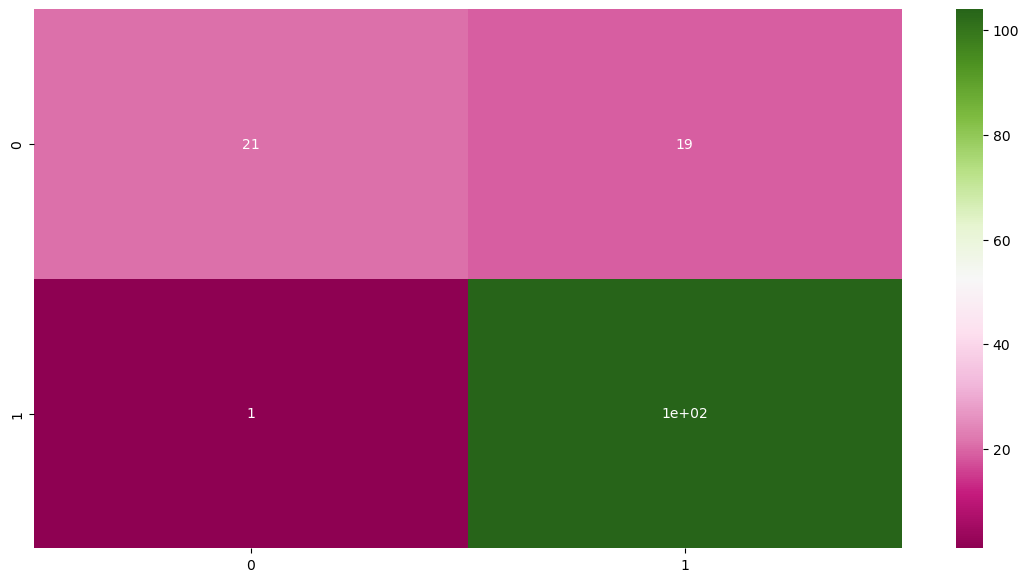

In [51]:
plt.figure(figsize=(14,7))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,cmap='PiYG')
plt.show()

### Grid Search CV

In [52]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [53]:
#Max number of levels in tree
max_depth = [int(x) for x in np.linspace(3,50,20)]

#Min number of samples required to split a node
min_samples_split = [5,8,10,12,15,20,30,35,40]

param_grid = {
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'criterion':['entropy','gini impurity']
}

In [54]:
grid_model = GridSearchCV(dt, param_grid,cv = 4)

In [55]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini impurity'],
                         'max_depth': [3, 5, 7, 10, 12, 15, 17, 20, 22, 25, 27,
                                       30, 32, 35, 37, 40, 42, 45, 47, 50],
                         'min_samples_split': [5, 8, 10, 12, 15, 20, 30, 35,
                                               40]})

In [56]:
grid_model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=20)

In [57]:
grid_model.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 20}

In [58]:
dt_grid = DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_split=20)

In [59]:
dt_grid.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=20)

### Random Search CV

In [60]:
random_model = RandomizedSearchCV(dt, param_grid, cv = 5)

In [61]:
random_model.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['entropy',
                                                      'gini impurity'],
                                        'max_depth': [3, 5, 7, 10, 12, 15, 17,
                                                      20, 22, 25, 27, 30, 32,
                                                      35, 37, 40, 42, 45, 47,
                                                      50],
                                        'min_samples_split': [5, 8, 10, 12, 15,
                                                              20, 30, 35, 40]})

In [62]:
random_model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=5)

In [63]:
random_model.best_score_

0.7452552793370757